# Valiate semantic similarity

This notebook tries to validate the consistency of the semantic similarity measures that have been developed.

## Common imports and initializations

In [1]:
import sys
PATHS_TO_ADD = [
    "../src"
]
for p in PATHS_TO_ADD:
    if p not in sys.path:
        sys.path.append(p)

In [2]:
from linguistic_analysis.semantics.similarity import SemGraph, get_triangulation_angle_distance

import numpy as np
import os
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm
from typing import Iterable, Tuple

## 1. Validate code

Load embedding models.

In [3]:
FULL_MODEL_PATH = "../models/french_novels/balzac/joint/accents_lemmatized/balzac_w2v_sg_w10_mincount5_ep/balzac_w2v_sg_w10_mincount5_ep.model"
PARTIAL_MODELS_DIR = "../models/french_novels/balzac/separate/with_accents_lemmatized"

full_model = KeyedVectors.load(FULL_MODEL_PATH)
model_paths = []
models = []

for root, dirs, files in os.walk(PARTIAL_MODELS_DIR):
    for f in files:
        if f.endswith(".model"):
            model_path = os.path.join(root, f)
            print("Loading {}...".format(model_path))
            model_paths.append(model_path)
            models.append(KeyedVectors.load(model_path))


Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Pierre Grassou - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Gobseck - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Le Contrat de mariage - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Une double famille - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Le Message - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/La Muse du departement - Honore de Balzac/model_w2v_s

Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Une tenebreuse affaire - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Modeste Mignon - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Ursule Mirouet - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Un episode sous la terreur - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Honorine - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Le pere Goriot - Honore de Balzac/model

Initial keywords

In [4]:
base_words = [
    "argent",
    "payement", 
    "paiement",
    "banque",
    "banquier",
    "crédit",
    "créancier",
    "capital",
    "dépôt",
    "prêt",
    "remboursement",
    "créance",
    "prix",
    "dette",
    "bail",
    "revenu",
    "rente",
    "franc",
#    "louis d’or",
    "écus",
    "budget"
]

**Build the base semgraph**

- Use this semgraph to select the words to include in every other semgraph.
- This set of words will be fixed.
- All the rest of the semgraphs will contain the same words.
- All links between words will be included in the semgraph.
- Set threshold for links of the semgraph to **0.7**.



In [5]:
N_TOP_SIMILAR = 10
SIMILARITY_THRESHOLD = 0.7

In [6]:
full_sem_graph = SemGraph.build_from_gensim_embedding(full_model, base_words, 
                                                      n_top_similar=N_TOP_SIMILAR,
                                                      similarity_threshold=SIMILARITY_THRESHOLD)


In [7]:
len(full_sem_graph.names)

26

### 1.1. Message passing based similarity

### 1.2. Graph triangulation based similarity

In [8]:
full_semgraph_triangulation = full_sem_graph.get_triangulation()

In [9]:
print("The triangulation has {} triangles".format(len(full_semgraph_triangulation.triangles)))
num_triangles = 100
print(f"\nThe {num_triangles} first triangles:")
for t in full_semgraph_triangulation.triangles[:num_triangles]:
    print(str(t) + "\n")

The triangulation has 211 triangles

The 100 first triangles:
Triangle[name: appointement_argent_revenu, appointement-argent: 1.0, argent-revenu: 1.0 ,appointement-revenu: 0.2873057723045349; cos_appointement: 0.14365288615226746, cos_argent: 0.9587276966002474, cos_revenu:0.14365288615226746]

Triangle[name: appointement_bail_revenu, appointement-bail: 1.0, bail-revenu: 1.0 ,appointement-revenu: 0.2873057723045349; cos_appointement: 0.14365288615226746, cos_bail: 0.9587276966002474, cos_revenu:0.14365288615226746]

Triangle[name: appointement_banque_revenu, appointement-banque: 1.0, banque-revenu: 1.0 ,appointement-revenu: 0.2873057723045349; cos_appointement: 0.14365288615226746, cos_banque: 0.9587276966002474, cos_revenu:0.14365288615226746]

Triangle[name: appointement_banquier_revenu, appointement-banquier: 1.0, banquier-revenu: 1.0 ,appointement-revenu: 0.2873057723045349; cos_appointement: 0.14365288615226746, cos_banquier: 0.9587276966002474, cos_revenu:0.14365288615226746]

Tr

## 2. Intra embedding consistency

## 3. Validation of the semantic similarity between different models

In [10]:
#print(f"{models[0]}: {model_paths[0]}")
#print(f"{models[1]}: {model_paths[1]}")

In [11]:
# Generate semgraphs for all the models
semgraphs = []
for m in tqdm(models):
    semgraphs.append(SemGraph.build_from_gensim_embedding(m, base_words, 
                                                      n_top_similar=N_TOP_SIMILAR,
                                                      similarity_threshold=SIMILARITY_THRESHOLD))

100%|██████████| 94/94 [00:10<00:00,  8.66it/s]


In [14]:
# Calculate the matrix of angle distances between the triangulations of the SemGraphs of the books.
RAD = True

angle_distance_matrix = np.zeros((len(semgraphs), len(semgraphs)))
for i in tqdm(range(len(semgraphs))):
    for j in tqdm(range(len(semgraphs))):
        if (i<j):
            angle_distance_matrix[i][j] = get_triangulation_angle_distance(semgraphs[i], semgraphs[j], rad=RAD)[1]
        else:
            angle_distance_matrix[i][j] = angle_distance_matrix[j][i]

 40%|████      | 38/94 [06:41<17:36, 18.87s/it]


 34%|███▍      | 32/94 [10:10<37:23, 36.19s/it]


 94%|█████████▎| 88/94 [20:25<00:53,  8.97s/it]


 87%|████████▋ | 82/94 [08:25<01:46,  8.85s/it]


100%|██████████| 94/94 [06:58<00:00,  4.45s/it]


 26%|██▌       | 24/94 [00:29<06:14,  5.36s/it]


 64%|██████▍   | 60/94 [04:32<06:08, 10.84s/it]


 37%|███▋      | 35/94 [00:55<03:58,  4.04s/it]


 38%|███▊      | 36/94 [00:07<00:51,  1.13it/s]


 74%|███████▍  | 70/94 [23:01<21:33, 53.89s/it]


 82%|████████▏ | 77/94 [04:16<02:17,  8.12s/it]


 94%|█████████▎| 88/94 [03:47<00:11,  1.95s/it]


 67%|██████▋   | 63/94 [00:49<02:56,  5.70s/it]


 80%|███████▉  | 75/94 [00:58<04:17, 13.56s/it]


100%|██████████| 94/94 [21:15:08<00:00, 813.92s/it]


In [15]:
angle_distance_matrix[0]

array([0.        , 1.31334161, 1.21460759, 1.43977369, 1.2670173 ,
       1.30073401, 1.27657681, 1.14508353, 1.18136657, 1.2670173 ,
       1.27073593, 1.19425503, 1.25729977, 1.31503494, 1.14081826,
       1.27138625, 1.2670173 , 1.1936213 , 1.19298865, 1.09232131,
       1.2670173 , 1.23417587, 1.32893346, 1.25665107, 1.17236466,
       1.21245292, 1.22428021, 1.16248367, 1.26461288, 1.27456209,
       1.44457345, 1.2233739 , 1.22879785, 1.2670173 , 1.15818363,
       1.10506143, 1.1441754 , 1.42998862, 1.17113983, 1.24757039,
       1.19671928, 1.2670173 , 1.16544495, 1.35865246, 1.23227907,
       1.47146999, 1.2670173 , 1.27575669, 1.26818689, 1.21607548,
       1.2670173 , 1.2670173 , 1.29311433, 1.22151181, 1.25804528,
       1.14893916, 1.26419258, 1.22188149, 1.16234692, 1.17544705,
       1.19951781, 1.10540832, 1.15156442, 1.2670173 , 1.31239924,
       1.07334968, 1.27476234, 1.23137835, 1.35947816, 1.2670173 ,
       1.24355599, 1.25682351, 1.11508925, 1.22083854, 1.13005

In [16]:
import plotly_express as px

?px.histogram

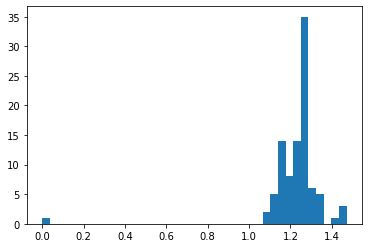

In [17]:
import matplotlib.pyplot as plt

plt.hist(angle_distance_matrix[0], bins=40);

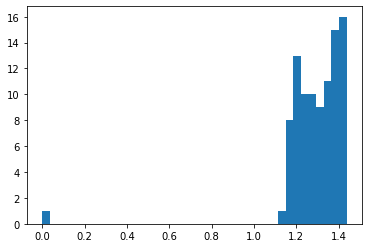

In [18]:
plt.hist(angle_distance_matrix[1], bins=40);

In [19]:
dir_name = "n_top_similar_10_similarity_threshold_0.7_rad_True" 
!mkdir -p $dir_name


In [20]:
# Save distance matrix
import pickle

f_name = "angle_distance_matrix.pck"

with open(os.path.join(dir_name, f_name), "bw") as f:
    pickle.dump(angle_distance_matrix, f)
    
with open(os.path.join(dir_name, "base_words_array.pck"), "bw") as f:
    pickle.dump(base_words, f)
    
with open(os.path.join(dir_name, "full_sem_graph.pck"), "bw") as f:
    pickle.dump(full_sem_graph, f)
    
with open(os.path.join(dir_name, "semgraphs_array.pck"), "bw") as f:
    pickle.dump(semgraphs, f)
    
with open(os.path.join(dir_name, "model_paths_array.pck"), "bw") as f:
    pickle.dump(model_paths, f)
    
with open(os.path.join(dir_name, "models_array.pck"), "bw") as f:
    pickle.dump(models, f)


In [21]:
#import pandas as pd
#
#df = pd.DataFrame(angle_distance_matrix)
#df.plot.h

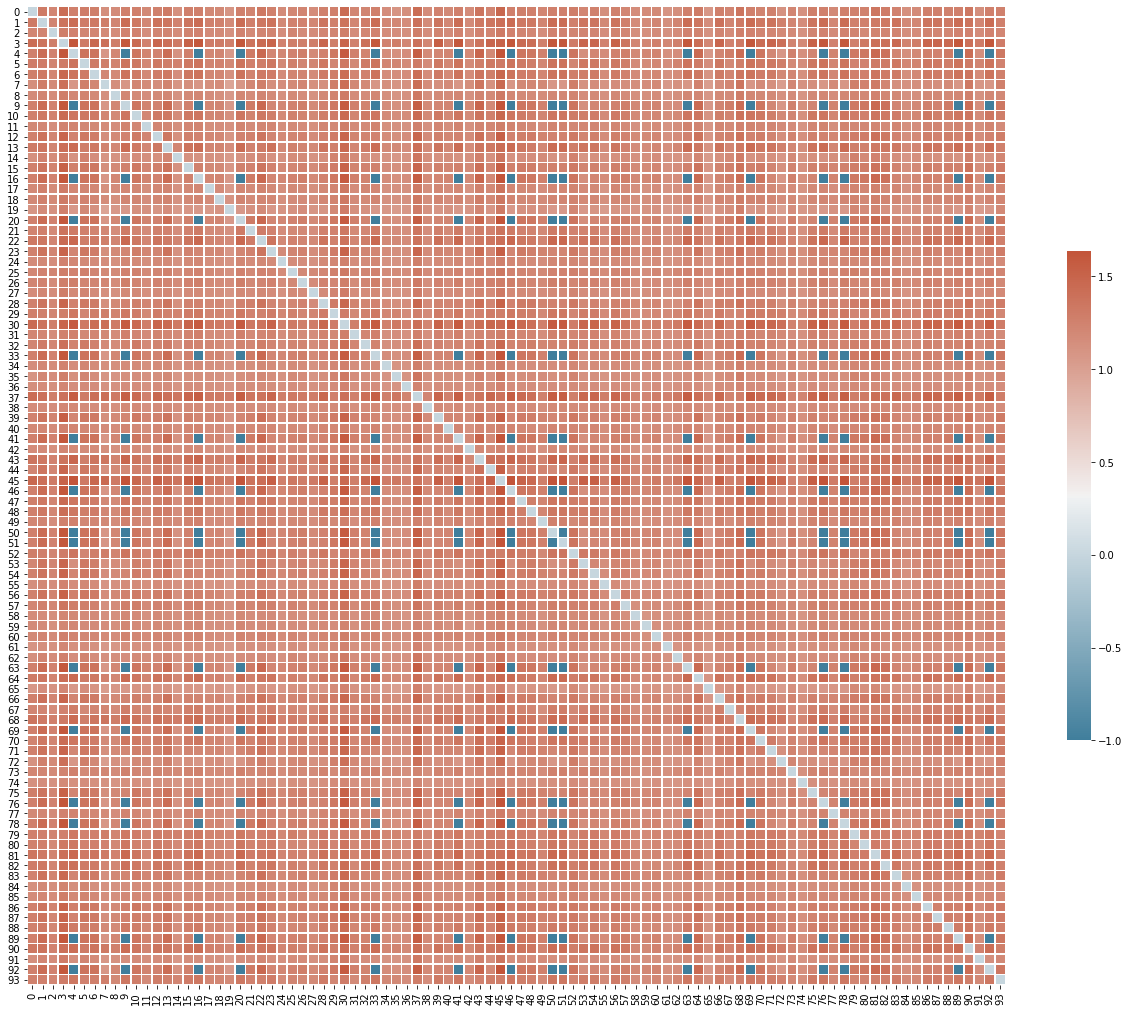

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#cmap="coolwarm"
#cmap="cool"
#cmap="gray_r"


#g = sns.heatmap(semantic_distance_matrix, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})
g = sns.heatmap(angle_distance_matrix,
                cmap=cmap, 
                square=True, 
                linewidths=.5, 
                cbar_kws={"shrink": .5}
               )

In [23]:
condensed_semantic_distance_vector = []
for i in range(1, angle_distance_matrix.shape[0]):
    for j in range(i+1, angle_distance_matrix.shape[0]):
        condensed_semantic_distance_vector.append(angle_distance_matrix[i,j])

In [24]:
condensed_semantic_distance_vector_normalized = [10 if v == -1 else v for v in condensed_semantic_distance_vector]

**Hierarchical clustering**

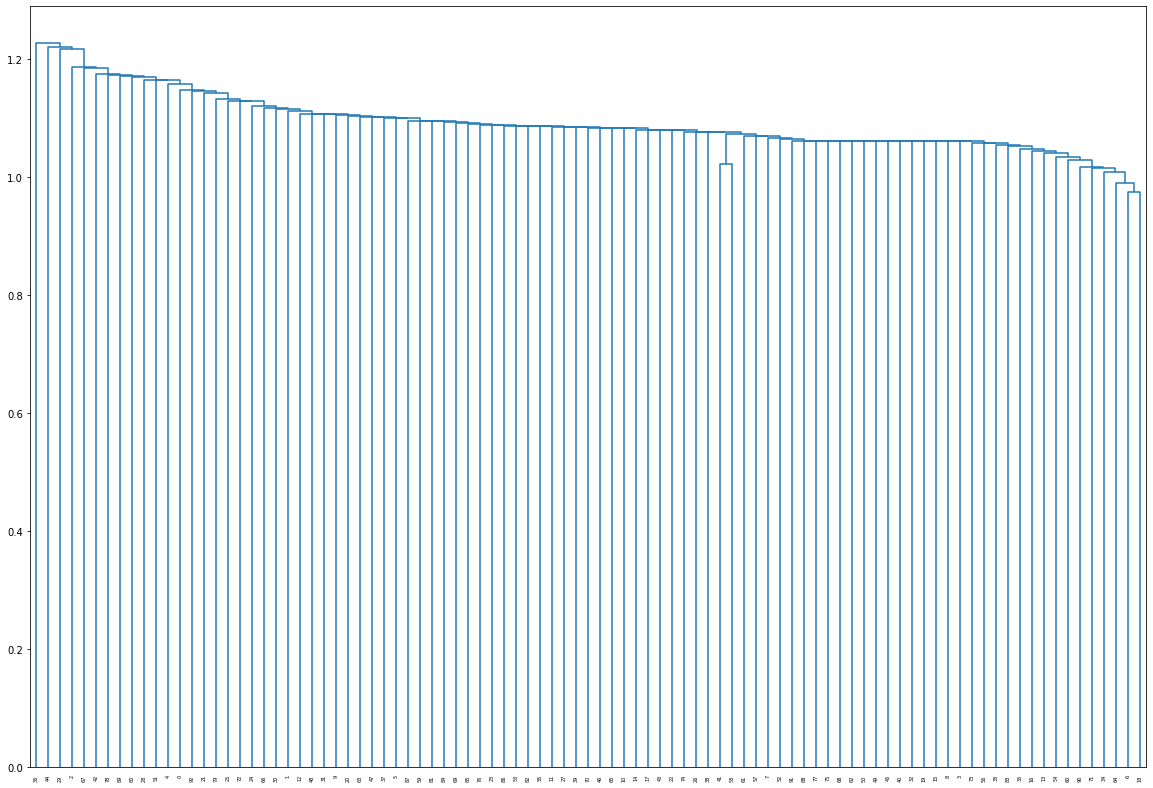

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(condensed_semantic_distance_vector_normalized, 'single', optimal_ordering=False)

#labelList = range(1, 11)

plt.figure(figsize=(20, 14))
dendrogram(linked,
            orientation='top',
#            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()